<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Generative AI for Business Applications</center></font>
<center><font size=6>AI Foundations - ML- Week 1</center></font>

<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/eb/Forbes_National_Bank_building%2C_Oakland%2C_Pittsburgh%2C_2023-05-20.jpg" alt="DALL-E-2025-02-27-15-47-37-An-international-outdoor-DTH-store-labeled-AUTHORIZED-DTH-OUTLET-with-a-m"width=720></a>
<center><font size=6>Customer Churn Prediction</center></font>

## Problem Statement

### Business Context

In the competitive landscape of the financial services sector, particularly within banking, customer retention is essential for sustaining long-term profitability and growth. With the industry grappling with high competition and a perpetual influx of options for consumers, the issue of customer attrition—where clients leave their banks for competitors—has become increasingly critical. This attrition can result in severe consequences for banks, including lost revenue, heightened marketing and customer acquisition costs, and damage to brand reputation. Consequently, understanding the root causes of customer churn and effectively predicting which customers are at risk of leaving has become a top priority for banks. This strategic focus is crucial for enhancing customer loyalty, better allocating resources, and driving overall business expansion.

By utilizing customer data such as demographics, account activity, and transaction history, banks can gain insightful perspectives into customer behavior, which can help them proactively identify potential churn risks. Predictive modeling techniques, particularly machine learning classifiers, can be employed to create a churn prediction system that empowers banks to take preemptive action before a customer chooses to depart. Such actions may include offering personalized incentives, enhancing customer service, or implementing targeted retention strategies tailored to individual customer needs.

### Objective

The bank is currently faced with the challenge of accurately predicting which customers are at risk of churning based on an array of data features. The available dataset encompasses a variety of characteristics, including demographic information, product usage details, and customer engagement metrics. The primary objective is to construct a predictive model capable of utilizing these customer characteristics to classify whether a customer is at risk of churn.

By accurately identifying at-risk customers, the bank can intervene proactively with tailored offers, improved customer support, or innovative loyalty programs before a customer's decision to leave is finalized. The end goal is to elevate customer engagement, foster loyalty, and ultimately secure its competitive advantage in the dynamic banking ecosystem.

### Data Description

The building block of any data science project is the data. Underneed you can find one data record which will be used in further analysis. The dataset consist of 10127 samples describing the customers and it's behavior.

The columns/features can be categorized as follow:

* ***Unique Id***:
    * **CLIENTNUM** : Unique identifier for the customer holding the account.


* ***Target***:
    * **Attrition_Flag**: Internal event (customer activity) variable - Existing Customer / Attrited Customer


* ***Demographic variables***:
    * **Customer_Age**: Demographic variable - Customer's Age in Years.
    * **Gender**: Demographic variable - M=Male, F=Female.
    * **Dependent_count**: Demographic variable - Number of dependents.
    * **Education_Level**: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.).
    * **Marital_Status**: Demographic variable - Married, Single, Divorced, Unknown.
    * **Income_Category**: Demographic variable - Annual Income Category of the account holder (<$40K, $40K - 60K, $60K - $80K, $80K-$120K, >$120K, Unknown).
    

* ***Product variables***:
    * **Card_Category**: Product Variable - Type of Card (Blue, Silver, Gold, Platinum).
    * **Months_on_book**: Period of relationship with bank.
    * **Total_Relationship_Count**: Total no. of products held by the customer.
    * **Months_Inactive_12_mon**: No. of Months in the last 12 months.
    * **Contacts_Count_12_mon**: No. of Contacts in the last 12 months.
    * **Credit_Limit**: Credit Limit on the Credit Card.
    * **Total_Revolving_Bal**: Total Revolving Balance on the Credit Card.
    * **Avg_Open_To_Buy**: Open to Buy Credit Line (Average of last 12 months)
    * **Total_Amt_Chng_Q4_Q1**: Change in Transaction Amount (Q4 over Q1).
    * **Total_Trans_Amt**: Total Transaction Amount (Last 12 months).
    * **Total_Trans_Ct**: Total Transaction Count (Last 12 months).
    * **Total_Ct_Chng_Q4_Q1**: Change in Transaction Count (Q4 over Q1).
    * **Avg_Utilization_Ratio**: Average Card Utilization Ratio.


## Importing Necessary Libraries

Before diving into data exploration and building churn prediction models, we first import the essential Python libraries that will guide us through each stage of this machine learning pipeline. These tools form the backbone of our analysis—from data cleaning to final evaluation.

Here’s what we’ll be using:

- **NumPy** and **Pandas** for efficient numerical operations and structured data manipulation.  
- **Matplotlib** and **Seaborn** for crafting clear, insightful visualizations that make patterns stand out.  
- **Scikit-learn** for preprocessing, model building, and performance evaluation.  
- **Additional libraries** as needed for scaling, encoding, and fine-tuning our models.

With these tools in hand, we are ready to begin our data-driven journey to uncover **what causes a customer to churn—and how we can predict it before it happens.**

***Prompt***:

<font size=3 color="navyblue"> I want to analyze the provided CSV data and build some classification model (Decision tree ,Random Forest , Gradient boost) to predict the insurance premium based on provided attributes. Help me import the necessary Python libraries to

- Analyze the data
- Visualize patterns in the data
- Preprocess the data
- Build classifications model
- Evaluate the model's performance
</font>

In [1]:
# Pandas: Used for data manipulation and analysis.
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

# NumPy: Used for numerical operations and array handling.
import numpy as np

# Matplotlib: Used for creating static, interactive, and animated visualizations.
import matplotlib.pyplot as plt

# Seaborn: Built on top of Matplotlib, provides a high-level interface for statistical graphics.
import seaborn as sns

# Scikit-learn (sklearn): A comprehensive library for machine learning tasks, including model tuning, performance evaluation, and data preprocessing.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# DecisionTreeClassifier: A basic decision tree classifier.
from sklearn.tree import DecisionTreeClassifier

# RandomForestClassifier: An ensemble method that combines multiple decision trees.
from sklearn.ensemble import RandomForestClassifier

# GradientBoostingClassifier: Another ensemble method that builds trees sequentially, correcting the errors of previous trees.
from sklearn.ensemble import GradientBoostingClassifier


## Loading the Data

Now that we have our libraries ready, the next step is to load the data we’ll be working with. This dataset contains information about customers—like their age, income, how long they’ve been with the bank, how often they use their credit card, and whether they stayed or left the bank.

We’ll use the Pandas library to load the data. Pandas makes it easy to work with tables of data and take a quick look at what’s inside.

Let’s load the dataset and see what it looks like.

***Prompt***:

<font size=3 color="navyblue"> Load the Bank_churners.csv file and store it as data.
</font>

In [2]:
data = pd.read_csv('../data/Churn Prediction.csv')


- The CSV file can also be directly loaded from Google Drive.

***Prompt***:

<font size=3 color="navyblue"> Load the Bank_churners.csv file from Google Drive and store it as data.
</font>

* We load our dataset from Google Drive.
* The file named **`Bank_churners`** has been stored there.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets/BankChurners.csv')


## Data Overview

Now that the dataset is loaded, the next step is to understand what the data looks like. Before we move on to building models, it’s important to take a closer look at the structure and contents of the dataset.

In this step, we will:

- Check how many rows and columns the dataset has  
- Look at the first few rows to get a feel for the data  
- See what data types each column has  
- Check for any missing or unusual values  

This basic overview will help us decide what kind of cleaning or preparation the data might need. Let’s explore the dataset and understand what we’re working with.

***Prompt***:

<font size=3 color="navyblue"> Display the number of rows and columns in the data.
</font>

In [3]:
data.shape

(10127, 21)

The dataset consists of 10127 rows and 21 columns

***Prompt***:

<font size=3 color="navyblue"> Display the first 10 rows of the DataFrame.
</font>

In [4]:
# prompt: Display the first 10 rows of the DataFrame.

print(data.head(10))


   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue  

**Note:** If the generated code is not displaying the data in a tabular format. To ensure it appears as a table, simply remove the `print` statement from commands like `print(df.head(10))` to  `df.head(10)`.

In [5]:
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.00,1247,2763.00,1.38,1088,24,0.85,0.31
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.00,2264,32252.00,1.98,1330,31,0.72,0.07
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.00,1396,27685.00,2.20,1538,36,0.71,0.05
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.00,2517,19835.00,3.35,1350,24,1.18,0.11
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.00,1677,9979.00,1.52,1441,32,0.88,0.14


***Prompt***:

<font size=3 color="navyblue"> Display the last 10 rows of the DataFrame data.
</font>

In [6]:
data.tail(10)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,...,3,4,17925.00,1909,16016.00,0.71,17498,111,0.82,0.11
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,...,3,4,9959.00,952,9007.00,0.82,10310,63,1.10,0.10
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,...,3,3,14657.00,2517,12140.00,0.17,6009,53,0.51,0.17
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,2,0,13940.00,2109,11831.00,0.66,15577,114,0.75,0.15
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,1,4,3688.00,606,3082.00,0.57,14596,120,0.79,0.16
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.00,1851,2152.00,0.70,15476,117,0.86,0.46
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.00,2186,2091.00,0.80,8764,69,0.68,0.51
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.00,0,5409.00,0.82,10291,60,0.82,0.00
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.00,0,5281.00,0.54,8395,62,0.72,0.00
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.00,1961,8427.00,0.70,10294,61,0.65,0.19


***Prompt***:

<font size=3 color="navyblue"> Display the names, data types, and number of entries in the columns of the dataset.
</font>

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

The dataset contains 10,127 records with 21 features, including a mix of numerical and categorical variables, and no missing values.

***Prompt***:

<font size=3 color="navyblue">Display the statistical summary of the dataset
</font>

In [8]:
data.describe()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,739177606.33,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27
std,36903783.45,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28
min,708082083.00,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,713036770.50,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02
50%,717926358.00,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18
75%,773143533.00,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50
max,828343083.00,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00


Note: To make the visualization easier to interpret, we can also transpose the data by appending `.T` at the end.

In [9]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00,739177606.33,36903783.45,708082083.00,713036770.50,717926358.00,773143533.00,828343083.00
Customer_Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00


**Credit Limit**:  
The average **credit limit** across customers is **\$8,632**, with significant variation (ranging from **\$1,438** to **\$34,516**). This indicates that while most customers have moderate credit limits, there are a few with much higher limits, potentially reflecting high-value or high-risk customers.

**Total Transaction Amount**:  
Customers have an average **total transaction amount** of **\$4,404**, with values ranging from **\$510** to **\$18,484**. This broad range suggests that some customers make very high-value transactions, while others engage in more modest spending.

**Total Transaction Count**:  
On average, customers make **65 transactions** throughout the year, with a range between **10** and **139 transactions**. This variation indicates that most customers engage moderately with the company, but a few customers have significantly higher transaction frequencies, potentially indicating more frequent usage or more active accounts.


***Prompt***:

<font size=3 color="navyblue"> Check how many duplicate rows are present in the dataset and explain the code
</font>

In [10]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Display the duplicate rows (optional)
# print(duplicate_rows)


Number of duplicate rows: 0


There are no duplicate records in the dataset. If any were present, they could be removed using `data.drop_duplicates()`.

## Exploratory Data Analysis

Now that we understand the structure of our dataset, it’s time to take a closer look at the details through Exploratory Data Analysis (EDA). This step helps us find patterns in the data and learn more about how different features behave.

In this section, we will:

- Look at how numerical features like age, credit limit, and transaction amounts are distributed  
- Check the balance of categorical features such as gender, card type, and income category  
- Explore how these features might relate to customer churn  

Doing EDA helps us understand the data better and prepares us for building a more accurate and meaningful model.

Let’s start exploring.

We manually categorize the columns into numerical and categorical types by inspecting the data, as some columns contain numeric values but represent categories—making it difficult to accurately separate them using prompting methods.

In [11]:
cat_columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
               'Income_Category', 'Card_Category','Total_Relationship_Count', 'Months_Inactive_12_mon',
               'Contacts_Count_12_mon', 'Dependent_count']
num_columns = ['Customer_Age', 'Months_on_book',
               'Credit_Limit', 'Total_Revolving_Bal',
               'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
               'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


### Univariate Analysis

#### Categorical Column

***Prompt***:

<font size=3 color="navyblue"> Visualize bar charts for `cat_columns` and explain the code.
</font>

The code loops through categorical columns, creates bar charts for each column, and displays the count of each category with labels on top of the bars.

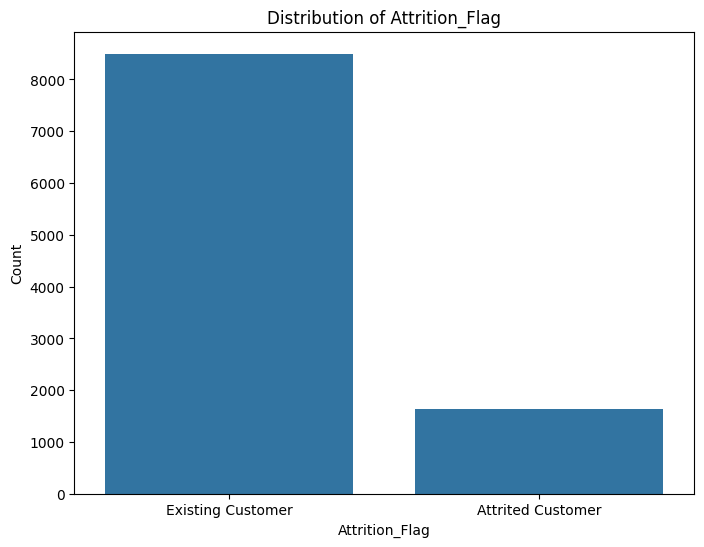

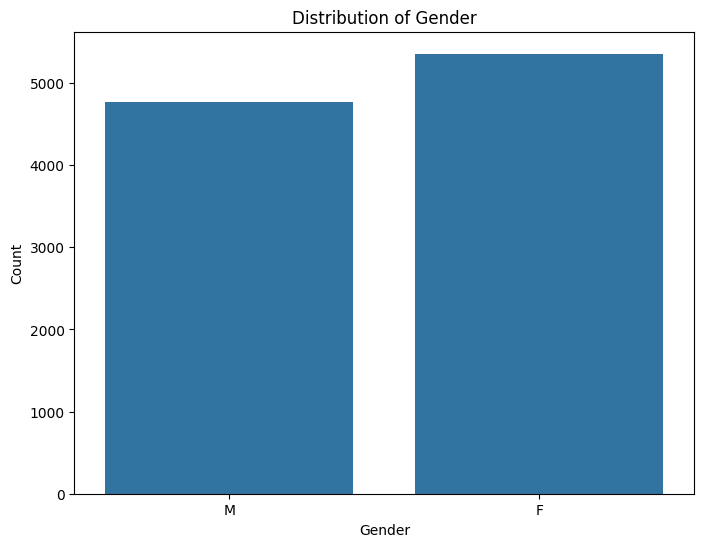

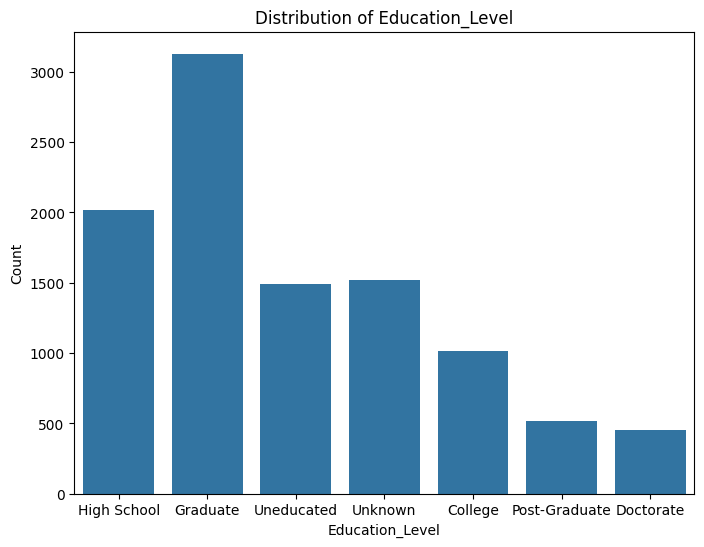

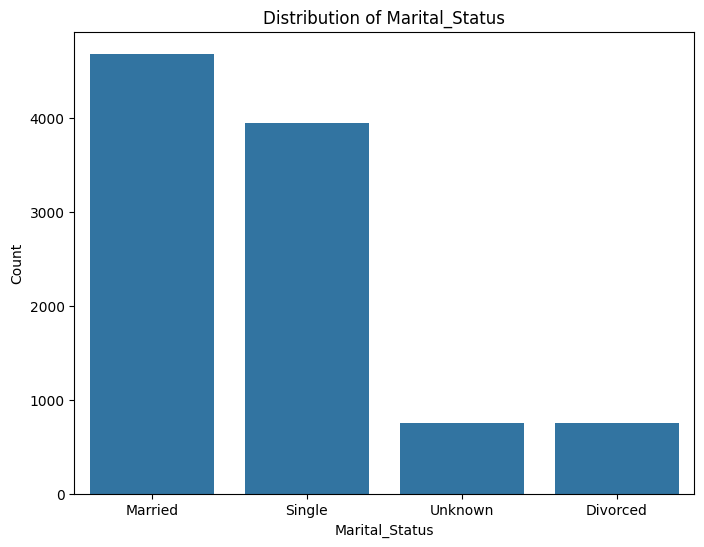

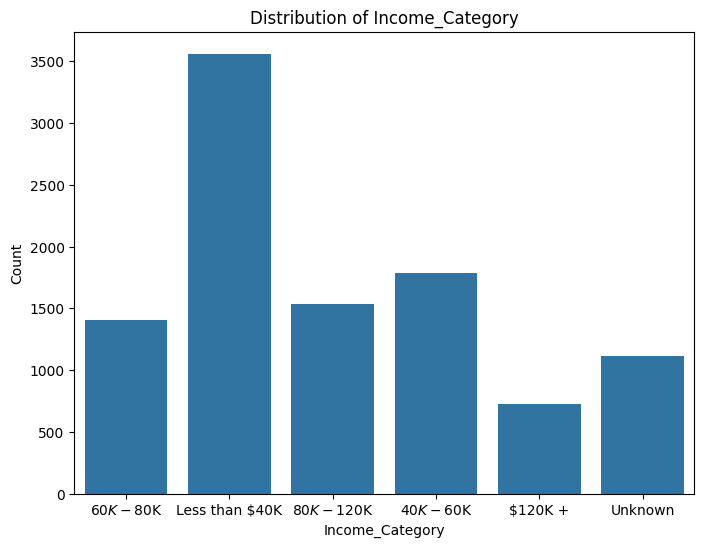

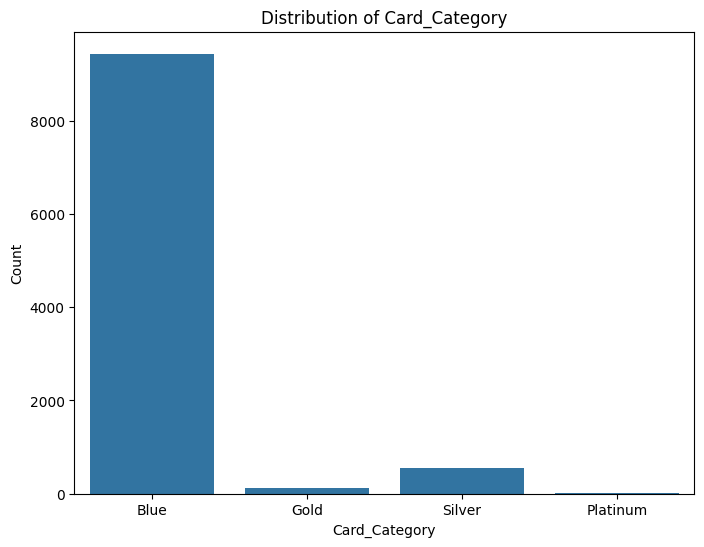

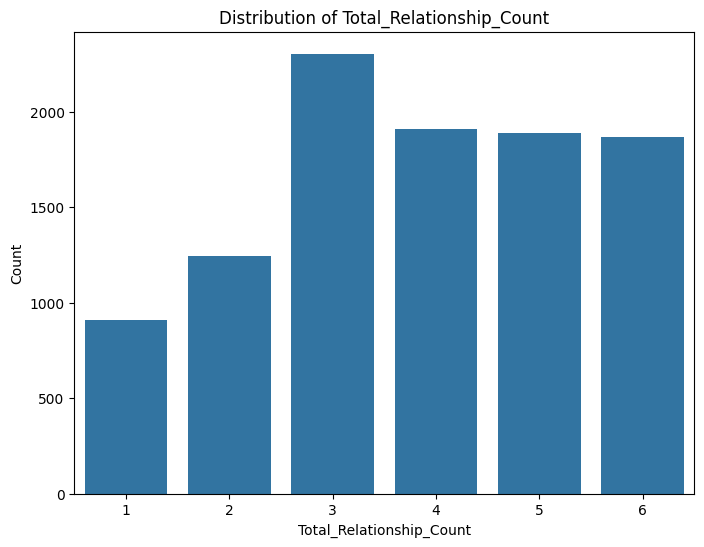

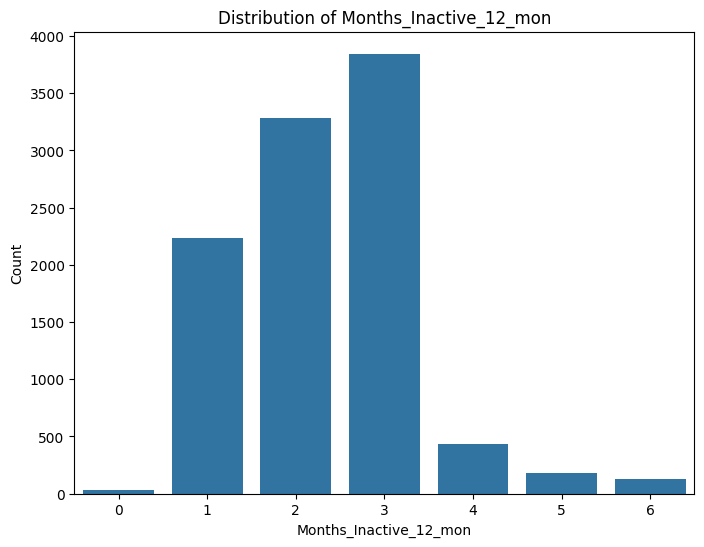

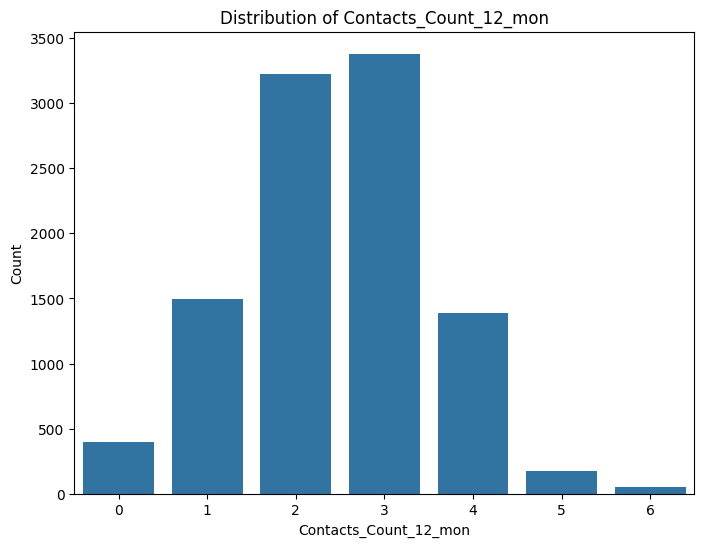

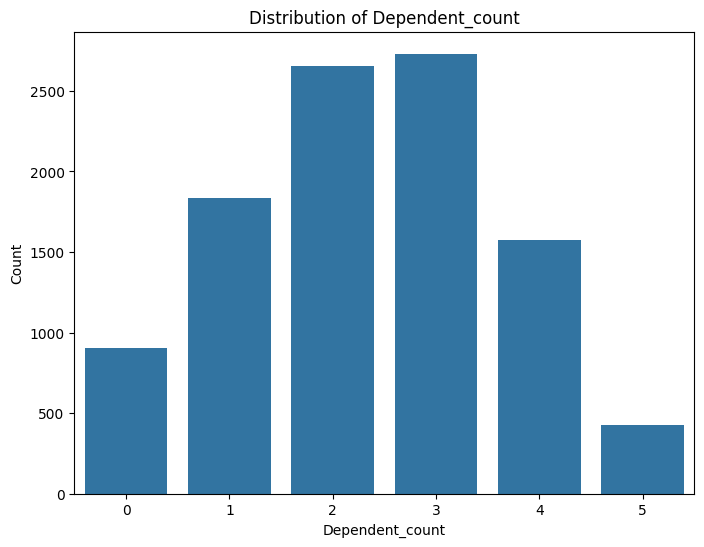

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each categorical column
for col in cat_columns:
    plt.figure(figsize=(8, 6))  # Set figure size for better visualization
    sns.countplot(x=col, data=data)  # Create countplot for the current column
    plt.title(f'Distribution of {col}')  # Set title of the plot
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Count')  # Set y-axis label
    plt.show()  # Display the plot



- **Most customers have a navyblue card**: The majority of customers hold a Blue card, suggesting it might be the bank's entry-level or most popular product.
- **Most cardholders earn less than 40K**: A large proportion of customers fall into the income category of less than $40K, indicating that the bank primarily serves individuals with lower income levels.
- **Equal proportion of male and female customers**: The customer base is almost evenly split between males and females, showing that the bank has balanced gender representation among its clients.

#### Numerical Columns


***Prompt***:

<font size=3 color="navyblue">  Visualize the box plot for the numerical column.

</font>

This code loops through all numerical columns in the dataset and generates a box plot for each one, visualizing the distribution and identifying outliers.

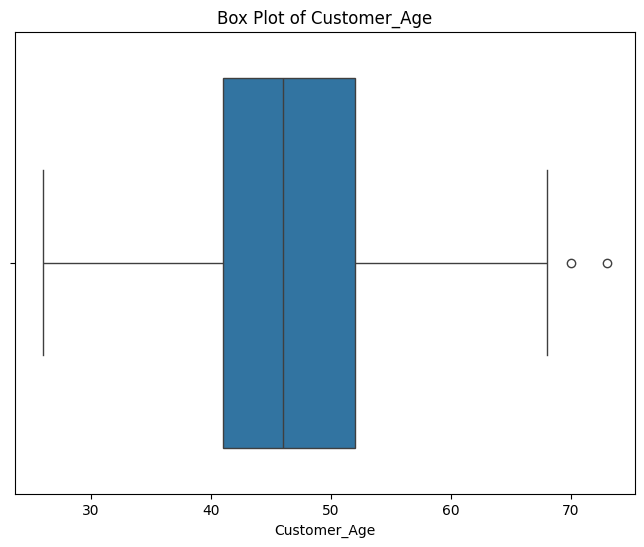

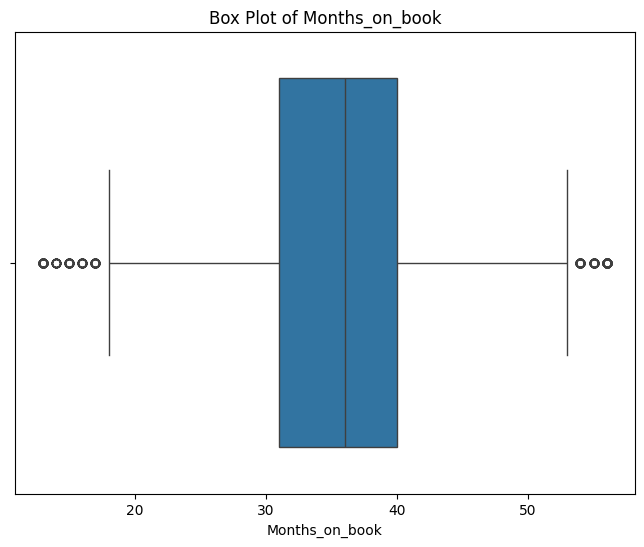

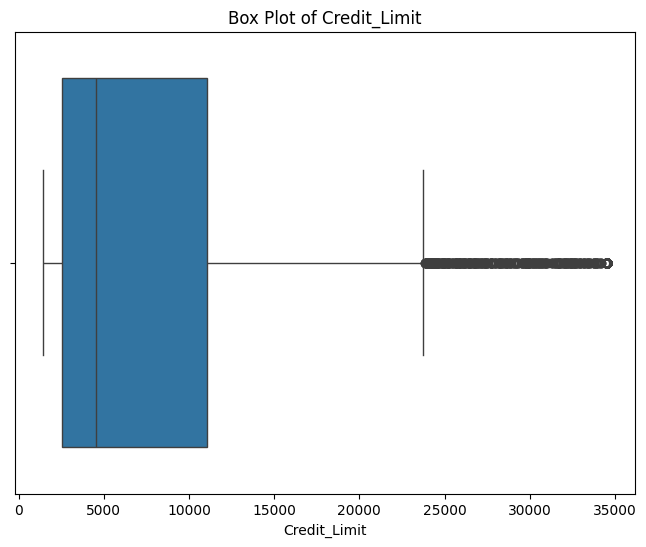

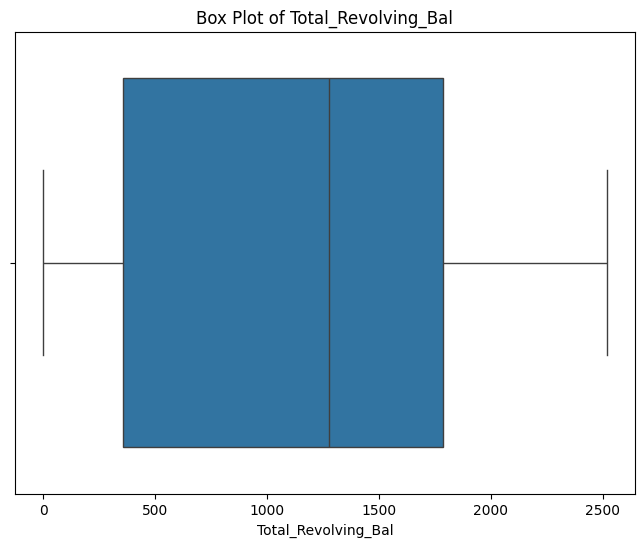

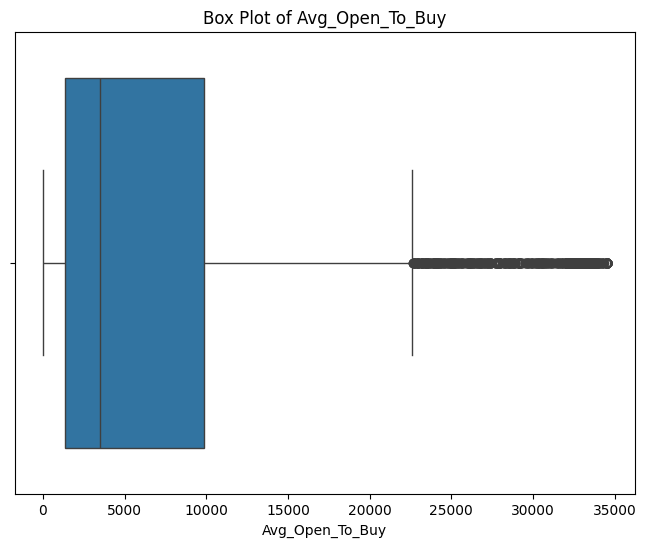

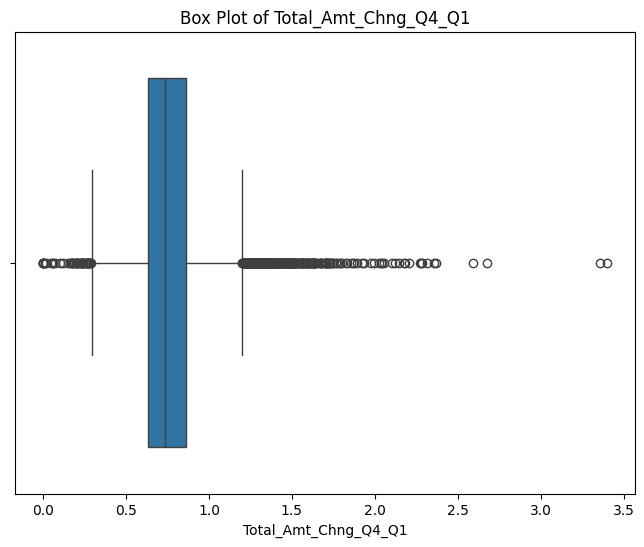

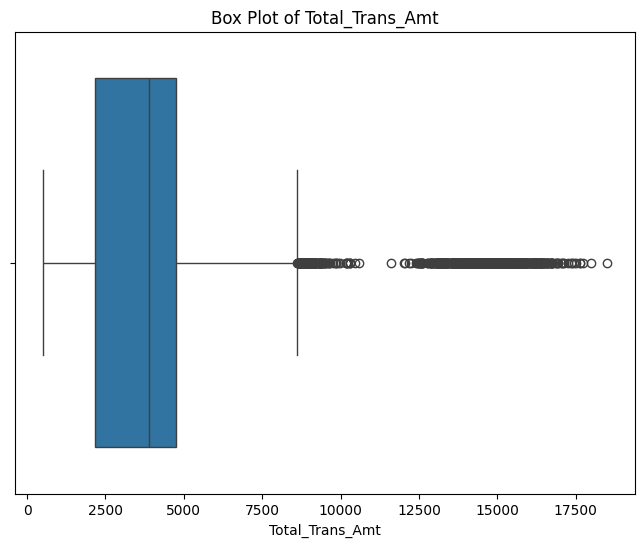

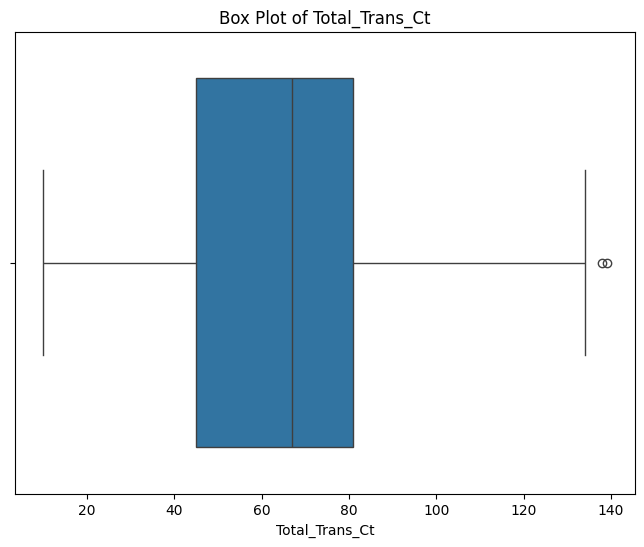

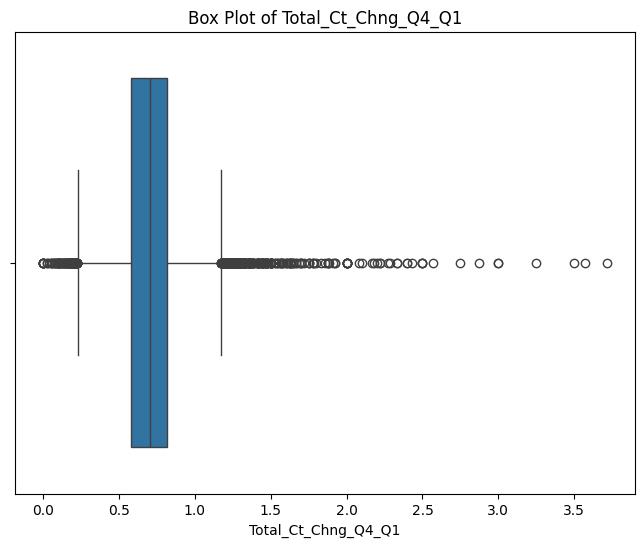

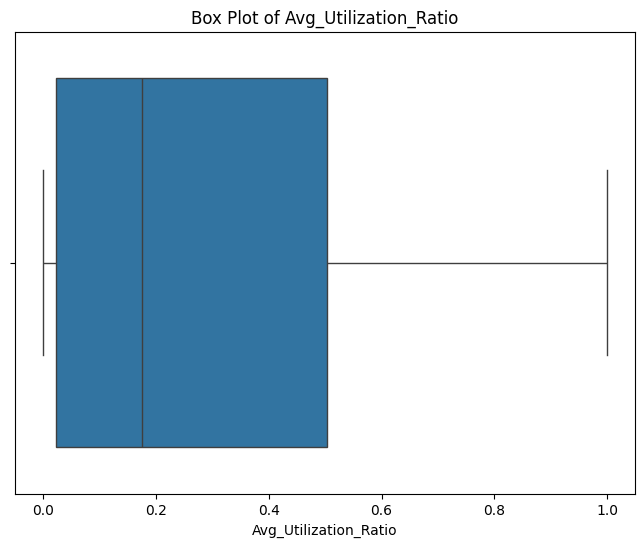

In [13]:
# Loop through numerical columns and create box plots
for column in num_columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=data[column])
  plt.title(f'Box Plot of {column}')
  plt.xlabel(column)
  plt.show()


- From the box plot of the numerical columns, we observed significant outliers in Total_Ct_Chng_Q4_Q1, Total_Trans_Amt, Total_Amt_Chng_Q4_Q1, Avg_Open_To_Buy, and Credit_Limit.
- The box plot of Credit Limit shows a significant concentration of values between approximately 5,000 and 10,000, with several outliers extending into much higher limits.
- The box plot of Total Transactions Amount indicates a central tendency around 2,500 to 5,000, with several outliers extending into much higher limits.

### Bivariate Analysis

***Prompt***:

<font size=3 color="navyblue"> Visualize the Age vs Attrition_Flag box plot.

</font>

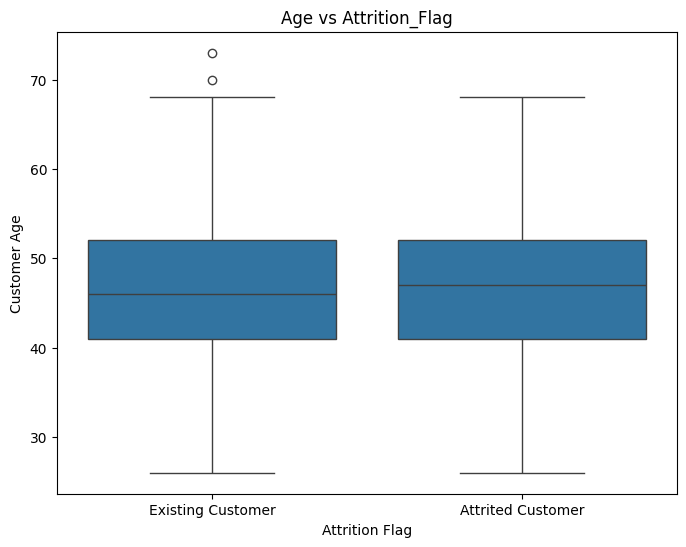

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=data)
plt.title('Age vs Attrition_Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('Customer Age')
plt.show()


  
1. **Age distribution is similar for both categories**, with **median ages** close to each other, indicating that customer attrition is not significantly affected by age.  
2. **Existing Customers have a few outliers in the older age range (above 70 years old)**, but overall, both groups exhibit a comparable spread in ages.  


***Prompt***:

<font size=3 color="navyblue">Visualize the percentage of attrited customers to existing customers for each Gender, sorted by percentage, using a chart.

</font>

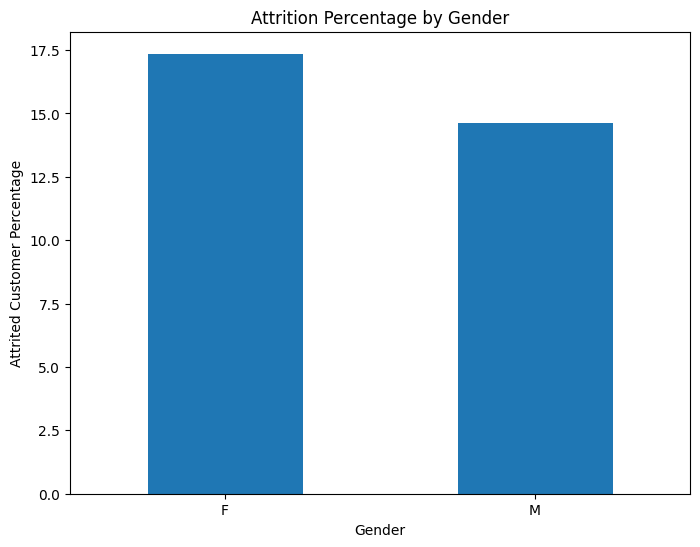

In [15]:
# Calculate the percentage of attrited customers to existing customers for each gender
gender_attrition = data.groupby('Gender')['Attrition_Flag'].value_counts(normalize=True).unstack()
gender_attrition['Attrited Customer Percentage'] = gender_attrition['Attrited Customer'] * 100
gender_attrition = gender_attrition.sort_values(by='Attrited Customer Percentage', ascending=False)

# Create a bar chart
plt.figure(figsize=(8, 6))
gender_attrition['Attrited Customer Percentage'].plot(kind='bar')
plt.title('Attrition Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrited Customer Percentage')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


- Female customers (F) have a higher attrition percentage (17.4%) compared to male customers (M), who have an attrition percentage of 14.6%.
- This suggests that female customers are more likely to churn than male customers.

***Prompt***:

<font size=3 color="navyblue"> Visualize the percentage of attrited customers to existing customers for each Income Level, sorted by percentage, using a plot.

</font>

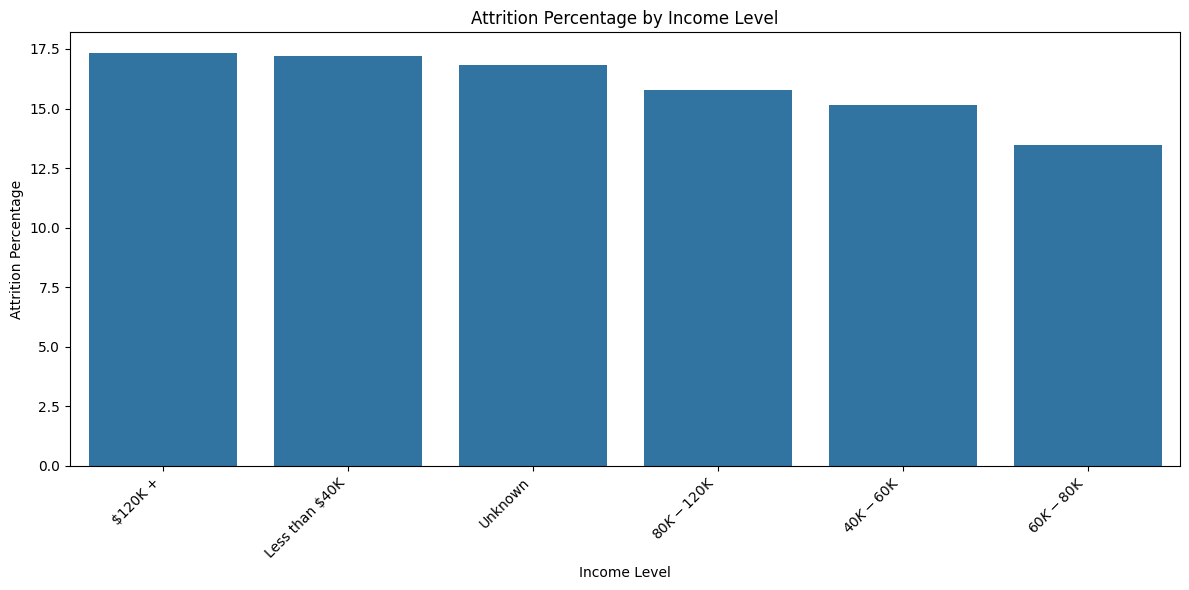

In [16]:
# Calculate the percentage of attrited customers for each income level
income_churn_counts = data.groupby(['Income_Category', 'Attrition_Flag'])['CLIENTNUM'].count().unstack()
income_churn_percentage = (income_churn_counts['Attrited Customer'] / (income_churn_counts['Attrited Customer'] + income_churn_counts['Existing Customer'])) * 100

# Create a DataFrame for the result and sort by percentage
churn_percentage_df = pd.DataFrame({'Percentage': income_churn_percentage}).sort_values('Percentage', ascending=False)

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_percentage_df.index, y='Percentage', data=churn_percentage_df)
plt.title('Attrition Percentage by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Attrition Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- **$120K+** income customers have the highest attrition percentage (17.4%), indicating a higher likelihood of churn in this group.

- **Less than $40K** income customers have the second-highest attrition percentage (17.2%), suggesting that lower income customers are at a higher churn risk.

- The **Unknown** income category shows a slightly lower attrition percentage (16.8%).

- Income categories **80K - 120K** (15.8%), **40K - 60K** (15.1%), and **60K - 80K** (13.5%) show progressively lower attrition percentages, with the highest retention observed in the **60K - 80K** category.

***Prompt***:

<font size=3 color="navyblue"> Visualize a boxplot to show the relationship between total transaction amount (`Total_Trans_Amt`) and customer churn (`Attrition_Flag`).




</font>

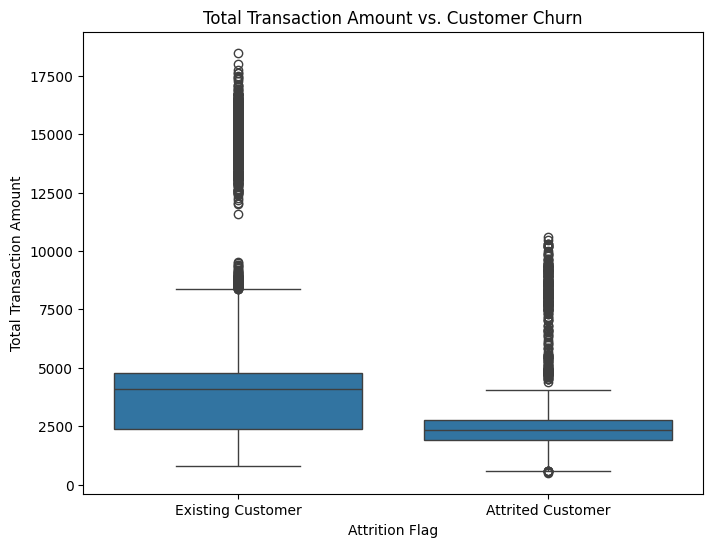

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=data)
plt.title('Total Transaction Amount vs. Customer Churn')
plt.xlabel('Attrition Flag')
plt.ylabel('Total Transaction Amount')
plt.show()


- The box plot reveals that customers who spend less are more likely to churn.
-The analysis shows that customers who spend approximately more than $11,000 are less likely to churn.

***Prompt***:

<font size=3 color="navyblue"> Visualize the percentage of attrited customers to existing customers for each Education Level, sorted by percentage, using a plot.


</font>

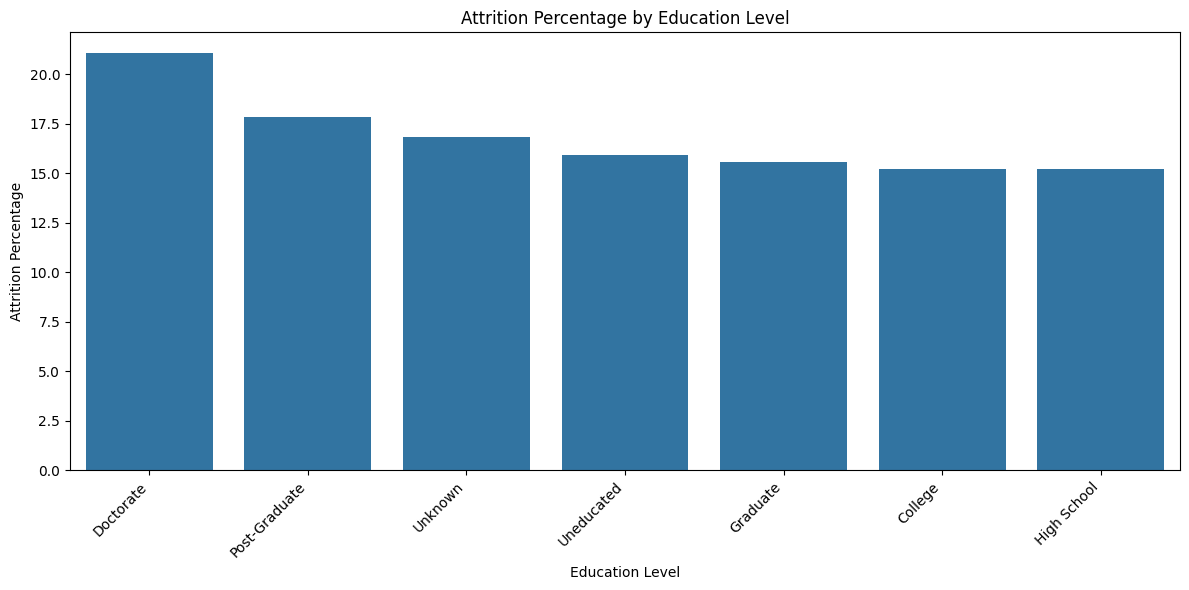

In [18]:
# Calculate the percentage of attrited customers for each education level
education_churn_counts = data.groupby(['Education_Level', 'Attrition_Flag'])['CLIENTNUM'].count().unstack()
education_churn_percentage = (education_churn_counts['Attrited Customer'] / (education_churn_counts['Attrited Customer'] + education_churn_counts['Existing Customer'])) * 100

# Create a DataFrame for the result and sort by percentage
churn_percentage_df = pd.DataFrame({'Percentage': education_churn_percentage}).sort_values('Percentage', ascending=False)

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_percentage_df.index, y='Percentage', data=churn_percentage_df)
plt.title('Attrition Percentage by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Attrition Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



- **Doctorate** level customers have the highest attrition percentage (21%), indicating the highest churn rate in this group.
- **Post-Graduate** customers show a relatively high attrition percentage (17.8%), suggesting a higher churn risk.
- **Unknown** education level customers have an attrition percentage of 16.8%.
- **Uneducated** customers have a similar attrition percentage (16%).
- **Graduate**, **College**, and **High School** customers all have lower attrition percentages (ranging from 15.2% to 15.6%), indicating better retention rates in these groups.

***Prompt***:

<font size=3 color="navyblue"> Visualize a box plot to show the distribution of `Credit_Limit` for both 'Existing' and 'Attrited' customers, using `Attrition_Flag` as the categorical variable.



</font>

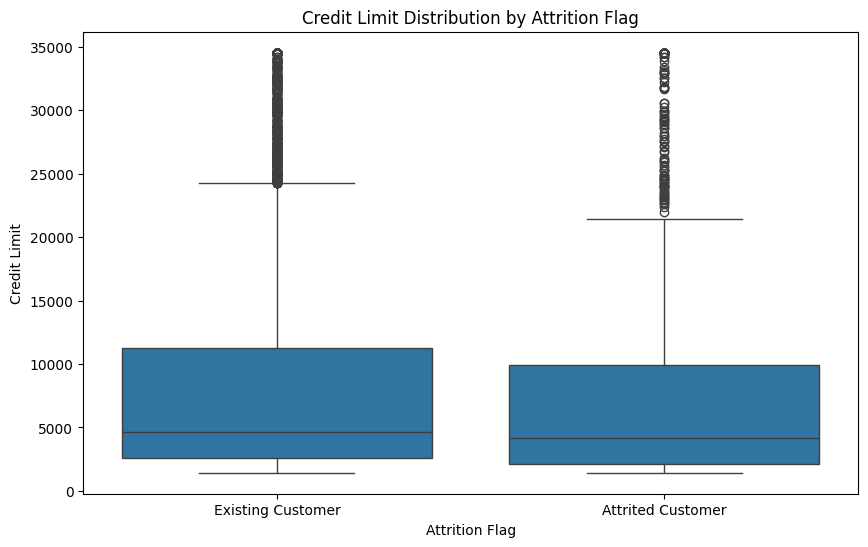

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=data)
plt.title('Credit Limit Distribution by Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('Credit Limit')
plt.show()


- The overall distribution of credit limits is similar between Existing and Attrited Customers.

- Customers with very high credit limits are more commonly found in the Existing Customer category.



***Prompt***:

<font size=3 color="navyblue"> Visualize the churn rate for each product type (using 'Card_Category') by displaying a stacked bar chart with the 'Attrition_Flag' column to show the proportion of 'Attrited' and 'Existing' customers for each card category.
</font>

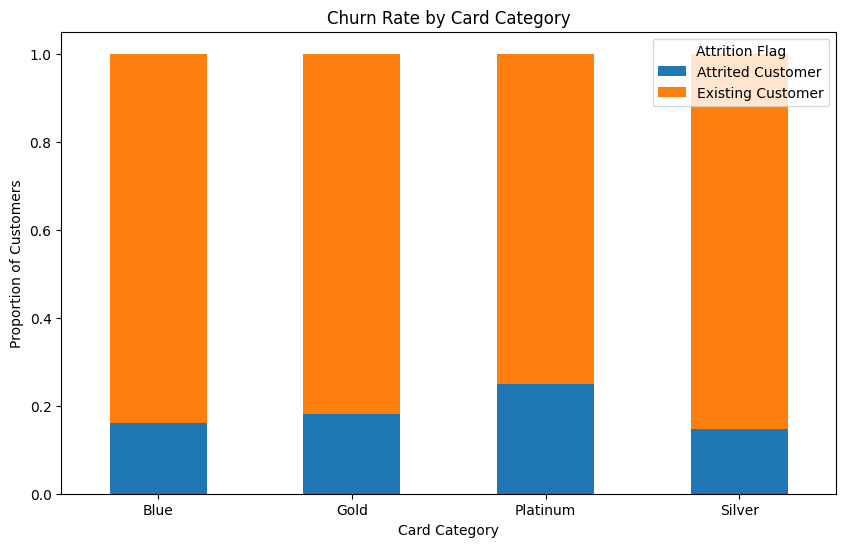

In [20]:
# Calculate the churn rate for each card category
churn_rates = data.groupby('Card_Category')['Attrition_Flag'].value_counts(normalize=True).unstack()

# Create the stacked bar chart
churn_rates.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn Rate by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=0)
plt.legend(title='Attrition Flag')
plt.show()



1. **Platinum cardholders have the highest churn rate**, as the proportion of **Attrited Customers** is higher compared to other categories.  
2. **Silver and Blue cardholders have the lowest churn rate**, indicating that customers in this category are more likely to remain **Existing Customers**.  

***Prompt***:

<font size=3 color="navyblue">  Visualize Months Inactive vs Attrition_Flag Bar chart


</font>

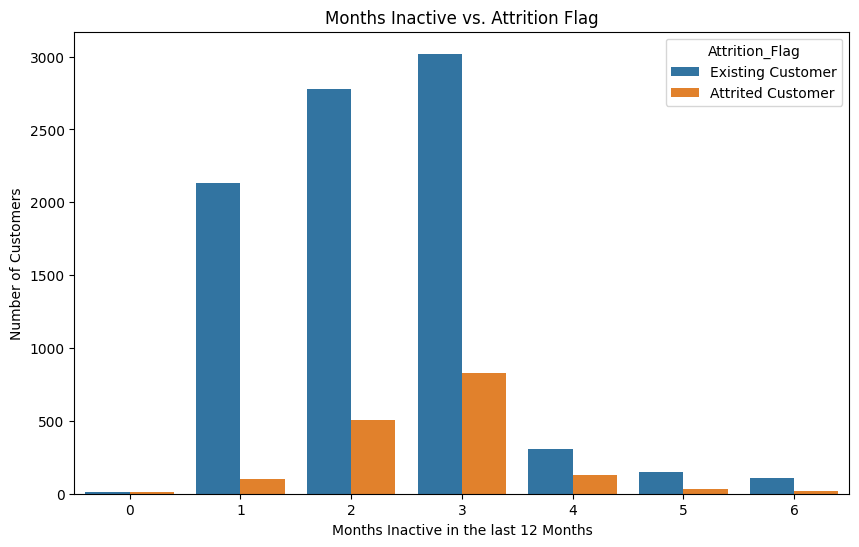

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Months_Inactive_12_mon', hue='Attrition_Flag', data=data)
plt.title('Months Inactive vs. Attrition Flag')
plt.xlabel('Months Inactive in the last 12 Months')
plt.ylabel('Number of Customers')
plt.show()


Customers inactive for 1-3 months dominate, with the highest attrition at 3 months. Attrition risk rises with inactivity, peaking at 3 months before sharply dropping. Engaging customers early (1-3 months inactive) can help reduce churn.

## Data Preprocessing

Before we can use this data to train a machine learning model, we need to prepare it properly. Most models need the data to be in a clean, structured, and numerical format.

In this step, we will do two important things:

**1. Encoding Categorical Variables**
Some of the columns in our dataset contain text values, like gender, income category, or card type. Since machine learning models work best with numbers, we need to convert these text values into numerical values using encoding methods.

**2. Splitting the Data**
To check how well our model works, we need to split the dataset into two parts:
- **Training set** – This part is used to train the model.
- **Testing set** – This part is used to test how well the model performs on new data.

Usually, we use around 70–80% of the data for training and the rest for testing. This helps us build a model that works well not just on the data it has seen, but also on new, unseen data.

Let’s begin preparing the data for modeling.

***Prompt***:

<font size=3 color="navyblue"> Remove the column CLIENTNUM


</font>

We are dropping the **CLIENTNUM** column as it is a unique identifier and doesn't contribute to model building.


In [22]:
data = data.drop('CLIENTNUM', axis=1)


***Prompt***:

<font size=3 color="navyblue"> Encode the `Attrition_Flag` column by assigning the value 0 to 'Existing Customer' and 1 to 'Attrited Customer'.


</font>

The code encodes the **Attrition_Flag** column by mapping 'Existing Customer' to 0 and 'Attrited Customer' to 1, making it suitable for model building.

In [23]:
# Create a mapping for 'Attrition_Flag'
attrition_mapping = {'Existing Customer': 0, 'Attrited Customer': 1}

# Use the map function to encode the column
data['Attrition_Flag'] = data['Attrition_Flag'].map(attrition_mapping)


***Prompt***:

<font size=3 color="navyblue">  Encode the column Education_Level , Income  based on hierarchy.


</font>

This code encodes the **Education_Level** and **Income_Category** columns based on predefined hierarchical mappings, assigning numeric values to each category for easier analysis or modeling.

In [24]:
# Create a mapping for 'Education_Level' based on hierarchy (example hierarchy)
education_mapping = {
    'Uneducated': 1,
    'High School': 2,
    'College': 3,
    'Graduate': 4,
    'Post-Graduate': 5,
    'Doctorate': 6,
    'Unknown': 0  # Handle 'Unknown' appropriately
}

data['Education_Level'] = data['Education_Level'].map(education_mapping)


# Create a mapping for 'Income_Category' based on hierarchy (example hierarchy)
income_mapping = {
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5,
    'Unknown': 0  # Handle 'Unknown' appropriately
}

data['Income_Category'] = data['Income_Category'].map(income_mapping)


***Prompt***:

<font size=3 color="navyblue">   Perform n-1 dummy encoding for `['Marital_Status', 'Card_Category']` and set the output `dtype` to `int`.


</font>

We use **n-1 dummy encoding** when the unique values in a categorical column are less than 10 to avoid multicollinearity, by dropping one category as the reference and preventing redundancy in the model.

The code performs **n-1 dummy encoding** on the **Marital_Status** and **Card_Category** columns, converting them into binary variables, and drops the first category of each to avoid multicollinearity. The resulting columns are set to the **int** data type.

In [25]:
# Perform n-1 dummy encoding for 'Marital_Status' and 'Card_Category'
data = pd.get_dummies(data, columns=['Marital_Status', 'Card_Category'],
                            drop_first=True, dtype=int)


***Prompt***:

<font size=3 color="navyblue">Encode the column gender


</font>

This code uses **LabelEncoder** to convert the categorical **Gender** column into numeric values, where each unique category is assigned a distinct integer.

In [26]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Gender' column
data['Gender'] = le.fit_transform(data['Gender'])


### Train Test Split

***Prompt***:

<font size=3 color="navyblue">Split the data into training and testing sets, using `Attrition_Flag` as the Dependent variable (`y`). Use 70% of the data for training and 30% for testing, while maintaining the same proportion of `Attrition_Flag` in both sets.


</font>

In [27]:

# Define the target variable (y) and the features (X)
y = data['Attrition_Flag']
X = data.drop('Attrition_Flag', axis=1)

# Split the data into training and testing sets, stratifying by the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (7088, 23)
X_test shape: (3039, 23)
y_train shape: (7088,)
y_test shape: (3039,)


## Model Building

### Model Evaluation Criterion

In customer churn prediction, missing actual churners (false negatives) is costly as it leads to lost customers.
To reduce this risk, the model should:

* **Maximize Recall** to catch more true churn cases
* **Minimize False Negatives** to avoid missing at-risk customers

This helps improve retention and reduce revenue loss.


***Prompt***:

<font size=3 color="navyblue">Create a blank DataFrame named model_eval_results to store the performance results of different models on the training and testing sets.
</font>

In [28]:
model_eval_results = pd.DataFrame(columns=['Model', 'Train_Accuracy', 'Train_Precision', 'Train_Recall', 'Train_F1',
                                           'Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1'])


### Decision Tree Classifier

A Decision Tree is a supervised learning algorithm used for both classification and regression tasks. It splits the data into branches based on feature values, forming a tree-like structure of decisions. It is easy to interpret, visualize, and doesn't require feature scaling. However, it can easily overfit the training data if not pruned (trimmed to reduce complexity by removing unnecessary branches).

**Key Points**

* Works well for small to medium-sized datasets with clear decision boundaries.
* Handles both numerical and categorical features.
* Prone to overfitting, so pruning or ensemble methods like Random Forest are often used.


***Prompt***:

<font size=3 color="navyblue">
Train the model using a Decision Tree classifier, evaluate it on the train and test data, store the results in `model_eval_result`, and display the result.

</font>

In [29]:
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Evaluate the model on training data
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
train_precision_dt = precision_score(y_train, y_train_pred_dt)
train_recall_dt = recall_score(y_train, y_train_pred_dt)
train_f1_dt = f1_score(y_train, y_train_pred_dt)

# Evaluate the model on testing data
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_precision_dt = precision_score(y_test, y_test_pred_dt)
test_recall_dt = recall_score(y_test, y_test_pred_dt)
test_f1_dt = f1_score(y_test, y_test_pred_dt)

# Store the results in model_eval_results
model_eval_results.loc[len(model_eval_results)] = ['Decision Tree', train_accuracy_dt, train_precision_dt, train_recall_dt, train_f1_dt,
                                                  test_accuracy_dt, test_precision_dt, test_recall_dt, test_f1_dt]

# Show the model evaluation results dataframe
print("\nModel Evaluation Results:")
model_eval_results


Model Evaluation Results:


,Model,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,Decision Tree,1.00,1.00,1.00,1.00,0.93,0.79,0.82,0.80


* **Train Performance**: Perfect scores (1.00) across all metrics suggest that the model has memorized the training data.
* **Test Performance**: Accuracy is decent at 0.93, but **precision (0.78)** and **recall (0.81)** drop significantly.
* **Inference**: The model is **overfitting** — it performs very well on training data but generalizes poorly to unseen data.




**Note**: We use `random_state=42` to control the randomness in processes like data shuffling and splitting, ensuring reproducibility and consistency of results across different runs, and you can choose any integer value for `random_state` as long as it remains consistent.

***Prompt***:

<font size=3 color="navyblue">Visualize the structure of trained decision tree

</font>

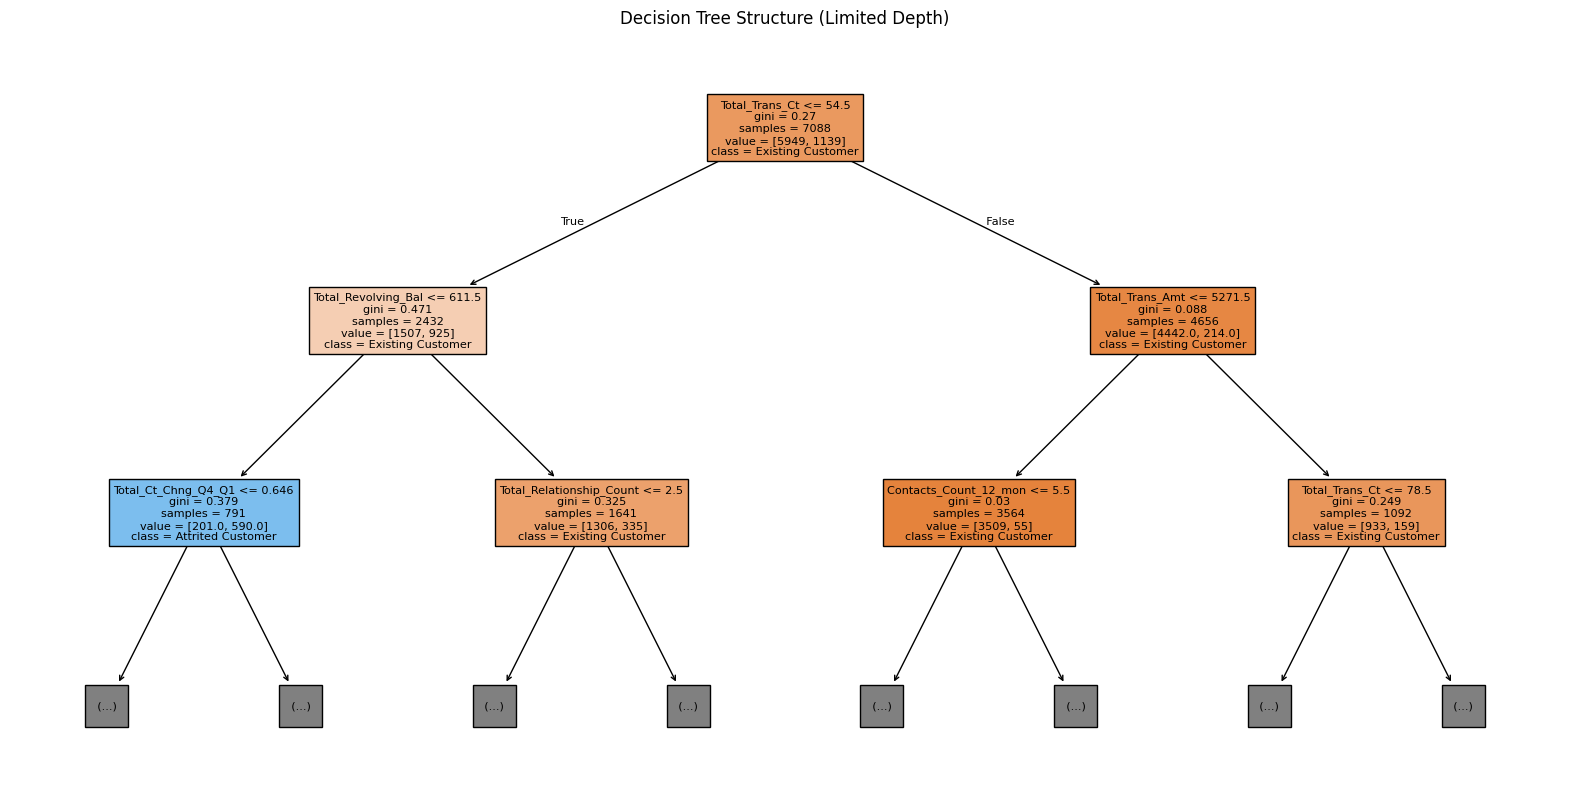

In [30]:
from sklearn.tree import plot_tree

# Visualize the decision tree (you might need to limit the depth for better readability)
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Existing Customer', 'Attrited Customer'], max_depth=2)
plt.title("Decision Tree Structure (Limited Depth)")
plt.show()

### Random Forest

Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs to improve accuracy and reduce overfitting. It uses bagging (a combination of random sampling with replacement and aggregation) and random feature selection, making it more robust and generalizable than a single decision tree. It performs well on both classification and regression tasks.


**Key Points**

* Reduces overfitting by averaging the results of many trees.
* Handles missing values and works well with large datasets.
* Less interpretable than a single decision tree but more accurate.


***Prompt***:

<font size=3 color="navyblue">Train the model using a Random Forest classifier, evaluate the model on train and test data ,store it in `model_eval_result` and show the result.
</font>

In [31]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on testing data
y_test_pred_rf = rf_model.predict(X_test)

# Make predictions on training data
y_train_pred_rf = rf_model.predict(X_train)

# Evaluate the model on training data
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf)
train_recall_rf = recall_score(y_train, y_train_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf)

# Evaluate the model on testing data
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)

# Store the results in model_eval_results
model_eval_results.loc[len(model_eval_results)] = ['Random Forest', train_accuracy_rf, train_precision_rf, train_recall_rf, train_f1_rf,
                                                  test_accuracy_rf, test_precision_rf, test_recall_rf, test_f1_rf]

# Show the model evaluation results dataframe
print("\nModel Evaluation Results:")
model_eval_results


Model Evaluation Results:


,Model,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,Decision Tree,1.00,1.00,1.00,1.00,0.93,0.79,0.82,0.80
1,Random Forest,1.00,1.00,1.00,1.00,0.96,0.92,0.80,0.85


* **Train Performance**: Also shows perfect scores (1.00), indicating a strong fit to training data.
* **Test Performance**: High accuracy (0.96) and better balance across metrics — precision (0.92), recall (0.80), and F1 (0.85).
* **Inference**: Although slightly overfitting, the model still generalizes **well to test data**, making it more reliable than the Decision Tree.



***Prompt***:

<font size=3 color="navyblue"> Visualize one of the decision trees from the trained Random Forest model.
</font>

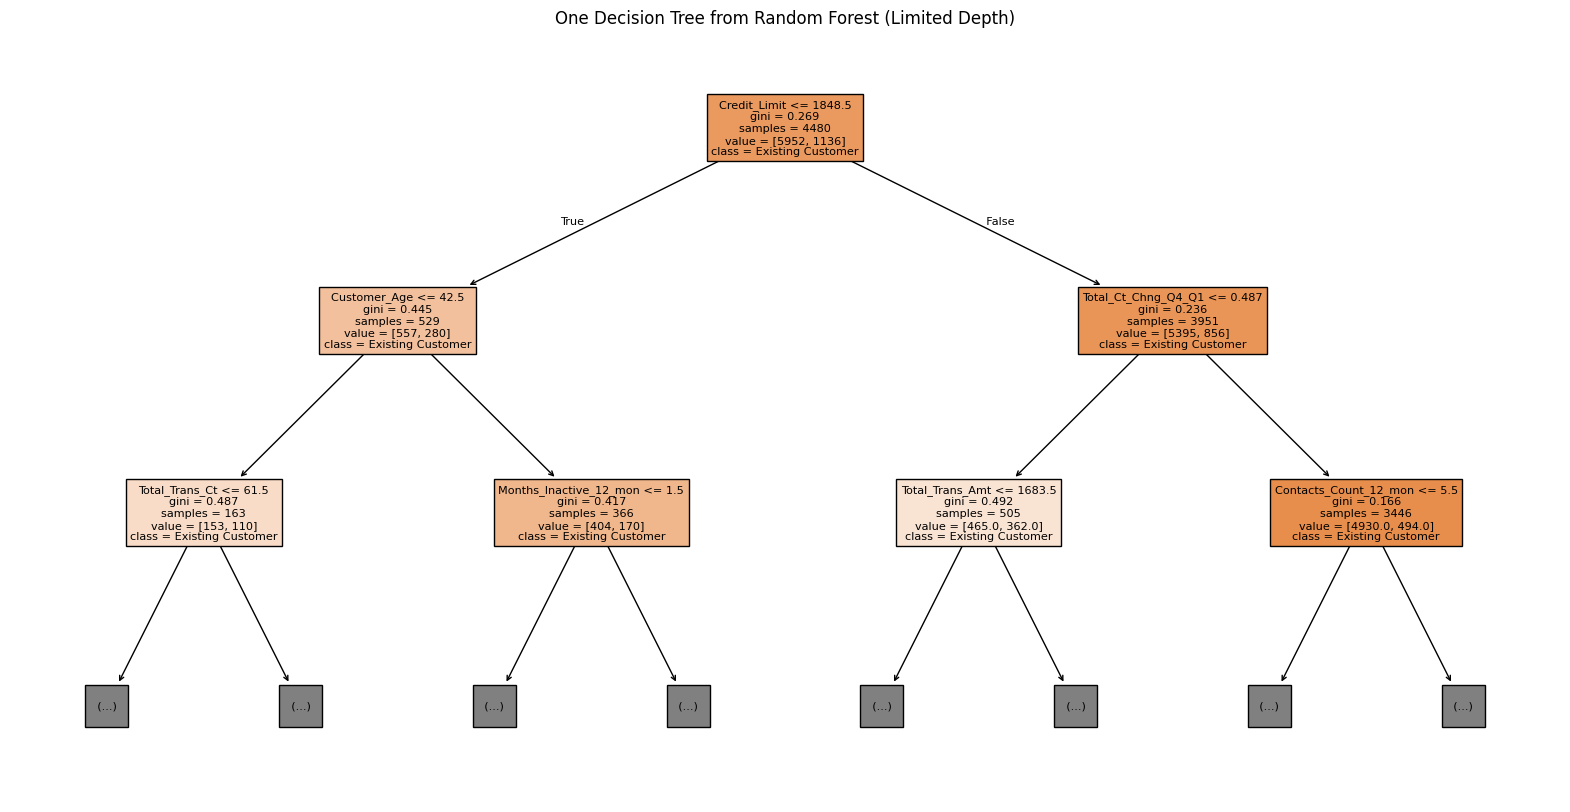

In [32]:
# You can visualize one of the trees from the Random Forest
plt.figure(figsize=(20,10))
# Select the first tree from the forest
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X.columns, class_names=['Existing Customer', 'Attrited Customer'], max_depth=2)
plt.title("One Decision Tree from Random Forest (Limited Depth)")
plt.show()

### Gradient Boosting

Gradient Boosting is an ensemble technique that builds models sequentially, where each new model corrects the errors of the previous ones. It combines weak learners (usually decision trees) into a strong predictor by minimizing a loss function. It’s highly accurate but can be sensitive to overfitting if not tuned properly.

**Key Points**

* Delivers strong predictive performance on both classification and regression tasks.
* Requires careful tuning of parameters like learning rate and tree depth.
* More computationally intensive than Random Forest but often more accurate.


***Prompt***:

<font size=3 color="navyblue"> Train the model using a gradient boost classifier, evaluate the model on train and test data ,store it in `model_eval_result` and show the results.
</font>

In [33]:
# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on testing data
y_test_pred_gb = gb_model.predict(X_test)

# Make predictions on training data
y_train_pred_gb = gb_model.predict(X_train)

# Evaluate the model on training data
train_accuracy_gb = accuracy_score(y_train, y_train_pred_gb)
train_precision_gb = precision_score(y_train, y_train_pred_gb)
train_recall_gb = recall_score(y_train, y_train_pred_gb)
train_f1_gb = f1_score(y_train, y_train_pred_gb)

# Evaluate the model on testing data
test_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
test_precision_gb = precision_score(y_test, y_test_pred_gb)
test_recall_gb = recall_score(y_test, y_test_pred_gb)
test_f1_gb = f1_score(y_test, y_test_pred_gb)

# Store the results in model_eval_results
model_eval_results.loc[len(model_eval_results)] = ['Gradient Boosting', train_accuracy_gb, train_precision_gb, train_recall_gb, train_f1_gb,
                                                  test_accuracy_gb, test_precision_gb, test_recall_gb, test_f1_gb]

# Show the model evaluation results dataframe
print("\nModel Evaluation Results:")
model_eval_results



Model Evaluation Results:


,Model,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,Decision Tree,1.00,1.00,1.00,1.00,0.93,0.79,0.82,0.80
1,Random Forest,1.00,1.00,1.00,1.00,0.96,0.92,0.80,0.85
2,Gradient Boosting,0.98,0.96,0.90,0.93,0.96,0.93,0.81,0.86


* **Train Performance**: Slightly below perfect, with accuracy (0.98), precision (0.96), recall (0.90), and F1 (0.93), indicating good learning without severe overfitting.
* **Test Performance**: Strong generalization with **accuracy (0.96)**, precision (0.93), recall (0.81), and F1 (0.86).
* **Inference**: Offers the **best balance between bias and variance** — great performance on both training and test sets with minimal overfitting.


***Prompt***:

<font size=3 color="navyblue"> Visualize one of the decision trees from the trained Gradient Boost model.
</font>

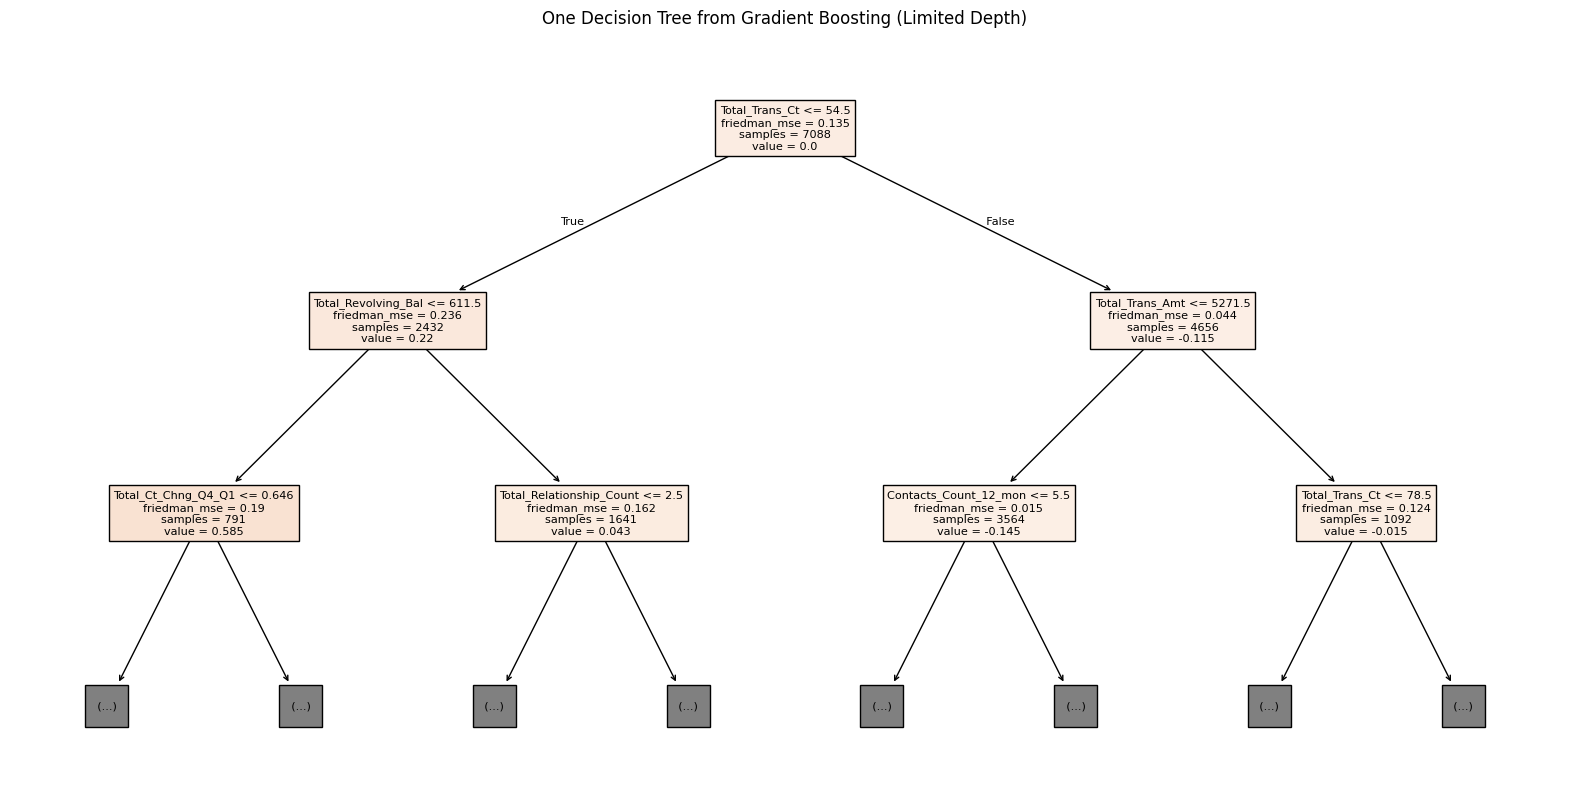

In [34]:
# Visualize one of the trees from the Gradient Boosting model
plt.figure(figsize=(20,10))
# Select the first tree from the forest (Gradient Boosting stores trees in estimators_)
plot_tree(gb_model.estimators_[0, 0], filled=True, feature_names=X.columns, class_names=['Existing Customer', 'Attrited Customer'], max_depth=2)
plt.title("One Decision Tree from Gradient Boosting (Limited Depth)")
plt.show()

## Final Model Selection

### Model Comparison

Among the three models, Gradient Boosting provides the best balance between training and test performance, with high precision, recall, and F1-score on unseen data. While Decision Tree and Random Forest show signs of overfitting, Gradient Boosting generalizes better than them.
**Therefore, Gradient Boosting is selected as the final model.**


**NOTE**: If you wish to further fine-tune the model, you can refer to the code provided in the Appendix section below.


### Feature Importance

***Prompt***:

<font size=3 color="navyblue"> Identify the features that most significantly impact customer churn using Gradient Boosting model.
</font>

Top 10 Features Impacting Customer Churn:
                     Feature  Importance
14            Total_Trans_Ct        0.33
13           Total_Trans_Amt        0.19
10       Total_Revolving_Bal        0.19
6   Total_Relationship_Count        0.11
15       Total_Ct_Chng_Q4_Q1        0.10
12      Total_Amt_Chng_Q4_Q1        0.03
8      Contacts_Count_12_mon        0.02
0               Customer_Age        0.02
7     Months_Inactive_12_mon        0.01
11           Avg_Open_To_Buy        0.00


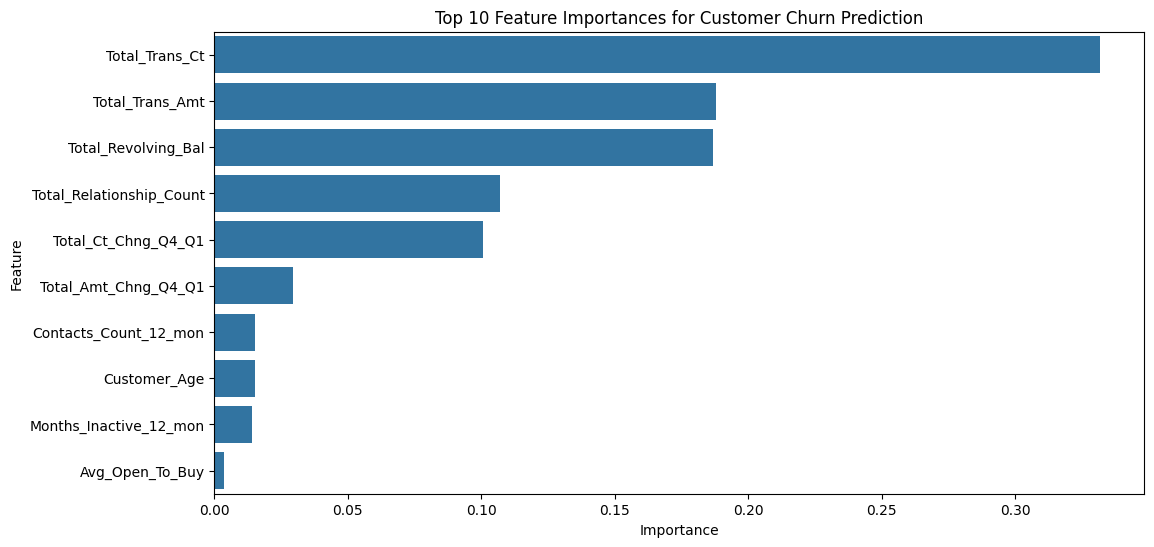

In [35]:
# Get feature importances from the trained Gradient Boosting model
feature_importances = gb_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the top 10 features that most significantly impact customer churn
print("Top 10 Features Impacting Customer Churn:")
print(feature_importance_df.head(10))

# You can visualize the feature importances using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances for Customer Churn Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


The top three attributes influencing customer churn are **Total\_Transaction\_Count**, **Total\_Transaction\_Amount**, and **Total\_Revolving\_Balance**.

## Actionable Insights and Business Recommendation

**1. Increase Customer Engagement (Low Transaction Count)**
- **Insight**: Low transaction counts suggest disengaged customers.
- **Recommendations**:  
  - Implement targeted marketing campaigns encouraging higher transaction volumes (e.g., rewards for more transactions).  
  - Educate customers on maximizing the value of their bank products, such as loyalty points and benefits tied to frequent use.  
  - Offer incentives like cashback or discounts for increasing transaction activity.

**2. Encourage Higher Spending (Low Transaction Amount)**
- **Insight**: Customers with low spending are not fully utilizing bank services.
- **Recommendations**:  
  - Offer personalized spending promotions (e.g., cashback or rewards for hitting spending thresholds).  
  - Cross-sell additional products like loans or savings accounts to increase customer engagement.  
  - Implement rewards programs tied to higher spending, such as bonus points or better interest rates.

**3. Support Customers with High Revolving Balances**
- **Insight**: High revolving balances indicate potential financial strain and churn risk.
- **Recommendations**:  
  - Offer balance transfer promotions with low or 0% interest for a limited period to help manage debt.  
  - Provide financial counseling and budgeting support to assist customers in managing debt.  
  - Offer flexible repayment plans to ease the financial burden and reduce churn risk.

**4. General Retention Strategy**
- **Insight**: Low engagement and high financial stress increase churn risk.
- **Recommendations**:  
  - Use churn prediction models to segment customers and offer tailored retention strategies.  
  - Proactively reach out to high-risk customers with personalized offers or support.  
  - Improve loyalty programs with customized rewards for more engaged customers.

By addressing the specific needs of disengaged and financially strained customers, the bank can increase retention, reduce churn, and foster long-term customer loyalty.

## Appendix



### Gradient Boosting - Fine Tuning


1. **Define Hyperparameter Grid** – Specify a range of values for key parameters to tune:

   * `n_estimators`: Number of trees to build (e.g., 100, 150). More trees may improve accuracy but can lead to overfitting.
   * `learning_rate`: Controls how much each tree contributes (e.g., 0.01, 0.1, 0.2). Lower rates make learning slower but safer.
   * `max_depth`: Maximum depth of individual trees (e.g., 3, 4, 5). Deeper trees can capture more patterns but may overfit.
   * `subsample`: Fraction of data used for each tree (e.g., 0.8, 1.0). Helps reduce variance and improve generalization.

2. **Initialize Gradient Boosting Classifier** – Create a `GradientBoostingClassifier` with a fixed `random_state` for reproducibility.

3. **Perform Grid Search** – Use `GridSearchCV` to try all combinations in the hyperparameter grid and select the best based on recall (`scoring='recall'`).

4. **Train the Best Model** – Fit the best estimator from the grid search on the full training dataset.

5. **Make Predictions** – Use the trained model to predict labels for the test set (`X_test`).

6. **Generate Classification Report** – Evaluate the model using metrics like precision, recall, F1-score, and accuracy to understand performance.


***Prompt***:

<font size=3 color="navyblue">  Fine-tune a Gradient Boosting classifier, train it on the dataset.


</font>

In [36]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [75, 100 , 125],
    'learning_rate': [0.01, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.5, 0.6]
}

# Initialize the Gradient Boosting Classifier
gb_model_tuned = GradientBoostingClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=gb_model_tuned, param_grid=param_grid, scoring='recall', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Train the best model found by GridSearchCV
best_gb_model = grid_search.best_estimator_
best_gb_model.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=4, n_estimators=125, random_state=42,
                           subsample=0.5)

**The parameters for the Tuned Gradient Boosting model are:**

* `max_depth = 4`: Restricts the depth of each tree, helping to balance model complexity and overfitting.
* `n_estimators = 125`: Uses 125 boosting rounds (trees) to build a strong ensemble without excessive computation.
* `subsample = 0.5`: Trains each tree on a random 50% subset of the data, introducing regularization and helping to reduce overfitting.
* `random_state = 42`: Ensures reproducibility of results.



***Prompt***:

<font size=3 color="navyblue">Evaluate the fine tuned model on training and testing data



</font>

In [37]:
# Make predictions on training and testing data with the fine-tuned model
y_train_pred_tuned = best_gb_model.predict(X_train)
y_test_pred_tuned = best_gb_model.predict(X_test)

# Evaluate the fine-tuned model on training data
train_accuracy_tuned = accuracy_score(y_train, y_train_pred_tuned)
train_precision_tuned = precision_score(y_train, y_train_pred_tuned)
train_recall_tuned = recall_score(y_train, y_train_pred_tuned)
train_f1_tuned = f1_score(y_train, y_train_pred_tuned)

# Evaluate the fine-tuned model on testing data
test_accuracy_tuned = accuracy_score(y_test, y_test_pred_tuned)
test_precision_tuned = precision_score(y_test, y_test_pred_tuned)
test_recall_tuned = recall_score(y_test, y_test_pred_tuned)
test_f1_tuned = f1_score(y_test, y_test_pred_tuned)

# Store the results in model_eval_results
model_eval_results.loc[len(model_eval_results)] = ['Gradient Boosting (Tuned)', train_accuracy_tuned, train_precision_tuned, train_recall_tuned, train_f1_tuned,
                                                  test_accuracy_tuned, test_precision_tuned, test_recall_tuned, test_f1_tuned]

# Show the model evaluation results dataframe
print("\nModel Evaluation Results:")
model_eval_results



Model Evaluation Results:


,Model,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,Decision Tree,1.00,1.00,1.00,1.00,0.93,0.79,0.82,0.80
1,Random Forest,1.00,1.00,1.00,1.00,0.96,0.92,0.80,0.85
2,Gradient Boosting,0.98,0.96,0.90,0.93,0.96,0.93,0.81,0.86
3,Gradient Boosting (Tuned),0.99,0.98,0.96,0.97,0.96,0.93,0.84,0.88


After fine-tuning the Gradient Boosting model, we observed an improvement in performance metrics, particularly an **increase in recall on the test set** compared to the base model. This means the tuned model is now better at correctly identifying customers who are likely to churn.


**NOTE**: We can further tweak the hyperparameters manually to improve the model's performance.


<font size=6 color="navyblue">Power Ahead!</font>
___